# **About the project**
In this project, I have used an MLP network to clssify images of people based on their sex.
A kaggle dataset is used to train, validate, and test the model. The link is given below:
https://www.kaggle.com/datasets/yasserhessein/gender-dataset

This dataset contains 178x218 images of paeople organised into folders for training, testing and validation with two classes- Male and Female.

After training and testing the model, it is used to predict the gender of people in a live stream inputed through webcam. I have used JavaScript and Python code from YouTube. Link of video and google colab notebook is given below:
https://youtu.be/YjWh7QvVH60?si=Qige4JYpuscp1w1l
https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=09b_0FAnUa9y

OpenCv (Haar Cascade) is used to identify faces in the image, and the model is run. Also, a function to run the model on inputted images is also cretated.

**Accuracy of the model is **90.72546362876892%

# **Demonstration on stock images**
Here, we have run the model on various stock images with people.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [ ]:
#loading dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserhessein/gender-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.32G/1.32G [00:23<00:00, 60.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1


In [ ]:
# separating the directories containing test, train and validation data
dataset_path = "/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset"
train_dir = os.path.join(dataset_path, 'Train')
test_dir = os.path.join(dataset_path, 'Test')
val_dir = os.path.join(dataset_path, 'Validation')

# initialising important variables
nb_train_samples =700
nb_validation_samples = 500
epochs = 20
batch_size = 25
img_width, img_height = 178,218

#checking data format and inputting accordingly
if keras.backend.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


In [ ]:
#building a model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=input_shape))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3)))

model.add(keras.layers.Conv2D(32, (3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3)))

model.add(keras.layers.Conv2D(64, (3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))
model.build()

In [ ]:
#compiling model
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])


In [ ]:
# preparing images for training
train_datagen = keras.preprocessing.image.ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

# preparing data for validation
validation_generator = test_datagen.flow_from_directory(
	val_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')



Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [ ]:
#training model
history = model.fit(
	train_generator,
	steps_per_epoch=nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size,
	shuffle=True
	)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8683 - loss: 0.2875 - val_accuracy: 0.9220 - val_loss: 0.2000
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8649 - loss: 0.3035 - val_accuracy: 0.9340 - val_loss: 0.1928
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9081 - loss: 0.2529 - val_accuracy: 0.9140 - val_loss: 0.2237
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8809 - loss: 0.2919 - val_accuracy: 0.9200 - val_loss: 0.2028
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8696 - loss: 0.2736 - val_accuracy: 0.9260 - val_loss: 0.1658
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9153 - loss: 0.2073 - val_accuracy: 0.9140 - val_loss: 0.2338
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8774 - loss: 0.2728 - val_accuracy: 0.9280 - val_loss: 0.2138
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8985 - loss: 0.2378 - val_accuracy: 0.9300 - val_loss:

Found 20001 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Loss =  0.16684602200984955
Accuracy =  93.46032738685608 %


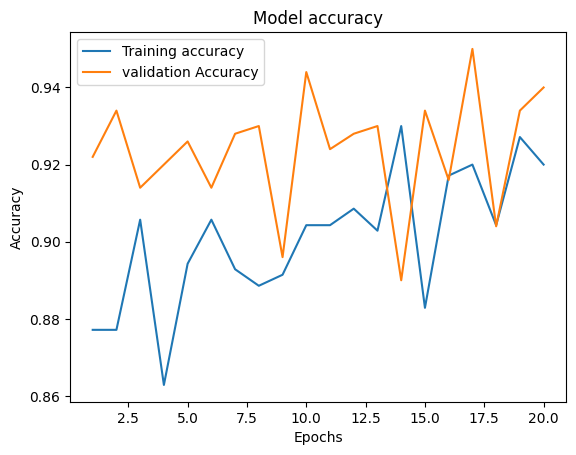

In [ ]:
#evaluate model on test data
test_generator = test_datagen.flow_from_directory(
	test_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')
results = model.evaluate(test_generator, verbose=0)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plotting accuracy
plt.plot(range(1,epochs+1),history.history['accuracy'], label="Training accuracy")
plt.plot(range(1,epochs+1),history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Functions used for video capture

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

#camera capture
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

<IPython.core.display.Javascript object>

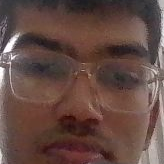

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Male


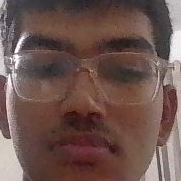

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Male


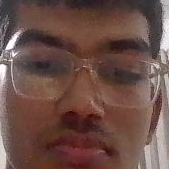

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Male


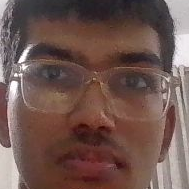

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Male


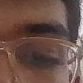

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Male


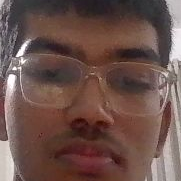

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Male


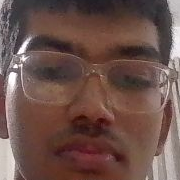

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Male


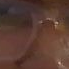

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Male


KeyboardInterrupt: 

In [119]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    '''img = cv2.resize(img, (img_width, img_height))  # Resize
    img = img.astype('float32') / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension'''



    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)



    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

       # Extract the face ROI from the original image
      face_roi = img[y:y+h, x:x+w]
      cv2_imshow(face_roi)

      # Preprocess the face ROI
      face_roi = cv2.resize(face_roi, (img_width, img_height))  # Resize
      face_roi = face_roi.astype('float32') / 255.0  # Normalize
      face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension

      #predicting gender
      prediction = model.predict(face_roi)
      if np.round(prediction)[0]==0:
        gender="Female"
      else:
        gender='Male'

      # adding predicted output to image
      cv2.putText(bbox_array,gender,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
      print(gender)
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes



In [ ]:
#function to identify and predict gender of faces in image
def pred_gender(path):
  img_path = path
  img = cv2.imread(img_path)

  # grayscale image for face detection

  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  # get face region coordinates
  faces = face_cascade.detectMultiScale(gray)

  # get face bounding box for overlay
  for (x,y,w,h) in faces:

    # Extract the face ROI from the original image
    face_roi = img[y-10:y+h+10, x-5:x+w+5]
    cv2_imshow(face_roi)

    # Preprocess the face ROI

    face_roi = cv2.resize(face_roi, (img_width, img_height))  # Resize
    face_roi = face_roi.astype('float32') / 255.0  # Normalize
    face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension

    #predicting gender
    prediction = model.predict(face_roi)
    if np.round(prediction)[0]==0:
      gender="Female"
      img = cv2.rectangle(img,(x-5,y-10),(x+w+5,y+h+10),(0,0,255),2)
      cv2.putText(img,gender,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    else:
      gender='Male'
      img = cv2.rectangle(img,(x-5,y-10),(x+5+w,y+h+10),(255,0,0),2)
      cv2.putText(img,gender,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
    print(gender,prediction)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

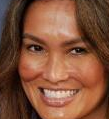

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Male [[0.7973016]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[1.]], dtype=float32)

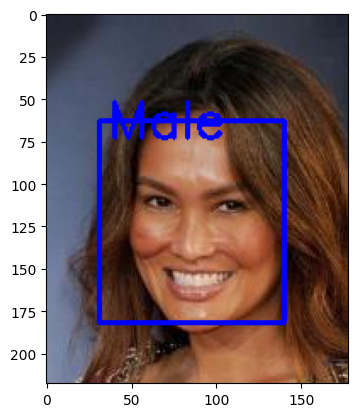

In [114]:
pred_gender("/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Test/Female/160011.jpg")
img=cv2.imread('/root/.cache/kagglehub/datasets/yasserhessein/gender-dataset/versions/1/Dataset/Test/Female/160011.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(img_width,img_height))
img=np.expand_dims(img,axis=0)
model.predict(img)